In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train1 = pd.read_csv('/kaggle/input/titanic/train.csv')
test1 = pd.read_csv('/kaggle/input/titanic/test.csv')

train = train1
test = test1

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
train.shape

(891, 12)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [86]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
test1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

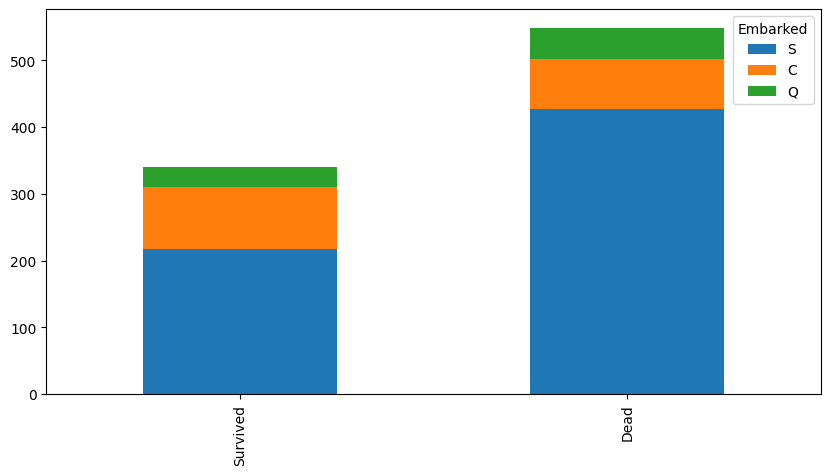

In [88]:
feature_selected = 'Sex'
feature_selected = 'Pclass'
feature_selected = 'SibSp'
feature_selected = 'Parch'
feature_selected = 'Embarked'

F_survived = train[train['Survived']==1][feature_selected].value_counts()
F_dead = train[train['Survived']==0][feature_selected].value_counts()
F_df=pd.DataFrame([F_survived,F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar',stacked=True,figsize=(10,5))

In [89]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
TDF = pd.DataFrame(train1)

TDF1 = TDF.iloc[:,[0,1,2,4,5,6]]
TDF1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp
0,1,0,3,male,22.0,1
1,2,1,1,female,38.0,1
2,3,1,3,female,26.0,0
3,4,1,1,female,35.0,1
4,5,0,3,male,35.0,0


In [91]:
TDF2 = TDF1.pivot_table('Survived', index='Sex',
                       columns='Pclass',aggfunc='mean')
TDF2

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: title={'center': 'average survivors rates'}, xlabel='Sex'>

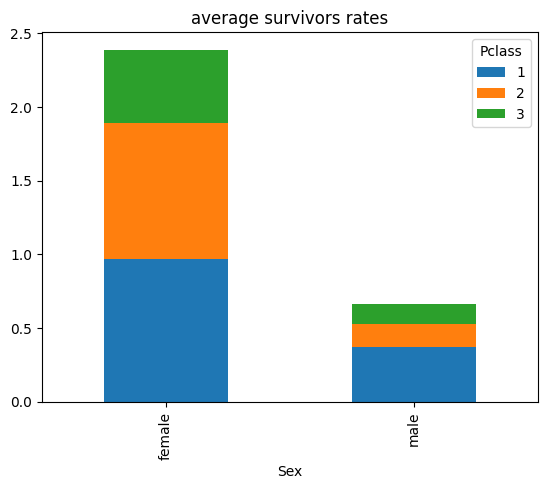

In [92]:
TDF2.plot(kind='bar',stacked=True,title='average survivors rates')

In [93]:
train = train1
train_test_data = [train,test]
for two_data in train_test_data:
    two_data['Title'] = two_data["Name"].str.extract(' ([A-Za-z]+)\.',expand =False)
    

In [94]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [95]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [96]:
train.Title.value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [97]:
test.Title.value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [98]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [99]:
pd.crosstab(test['Title'],test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [100]:
train.groupby('Title')['Survived'].apply(lambda x:x.mean())

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [101]:
title_mapping = {'Mr':0,'Rev':0,'Don':0,'Capt':0,'Jonkheer':0,
                'Miss':1,'Ms':1,
                'Mrs':2,'Lady':2,'Dona':2,'Mme':2,'Countess':2,
                 'Master':3,'Dr':3,'Mlle':3,
                'Col':4,'Major':4,"Sir":4}
for two_data in train_test_data:
    two_data['Title'] = two_data['Title'].map(title_mapping)

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [103]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [104]:
train.drop("Name",axis = 1, inplace = True)
test.drop("Name",axis=1, inplace = True)

In [105]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [106]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


<Axes: >

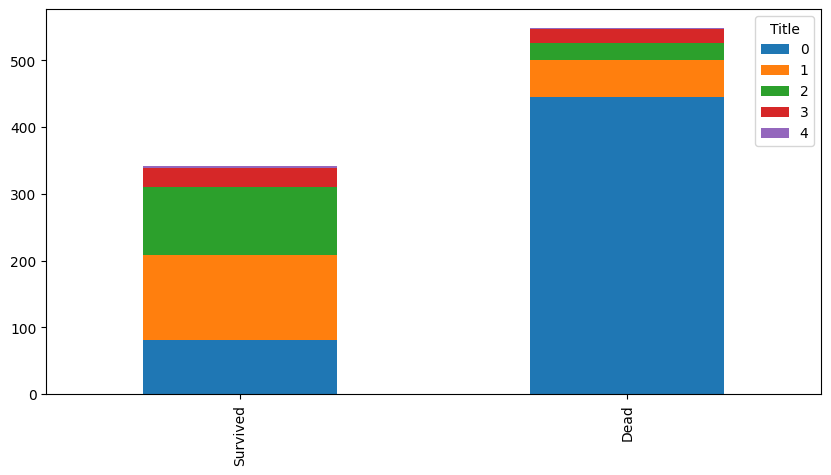

In [107]:
feature_selected = 'Title'

F_survived = train[train['Survived']==1][feature_selected].value_counts().sort_index()
F_dead = train[train['Survived']==0][feature_selected].value_counts().sort_index()
F_df = pd.DataFrame([F_survived, F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar',stacked=True,figsize=(10,5))

In [108]:
sex_mapping = {'male':0,'female':1}
for two_data in train_test_data:
    two_data['Sex']=two_data['Sex'].map(sex_mapping)

In [109]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [111]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('mean'),inplace=True)

/tmp/ipykernel_185/658217733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'),inplace=True)
/tmp/ipykernel_185/658217733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [113]:
train['Age'].describe()

count    891.000000
mean      29.785460
std       13.248040
min        0.420000
25%       21.816327
50%       30.000000
75%       35.873874
max       80.000000
Name: Age, dtype: float64

In [114]:
train['Age'].value_counts()

Age
32.652334    119
21.816327     36
24.000000     30
22.000000     27
18.000000     26
            ... 
14.500000      1
70.500000      1
12.000000      1
36.500000      1
74.000000      1
Name: count, Length: 92, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

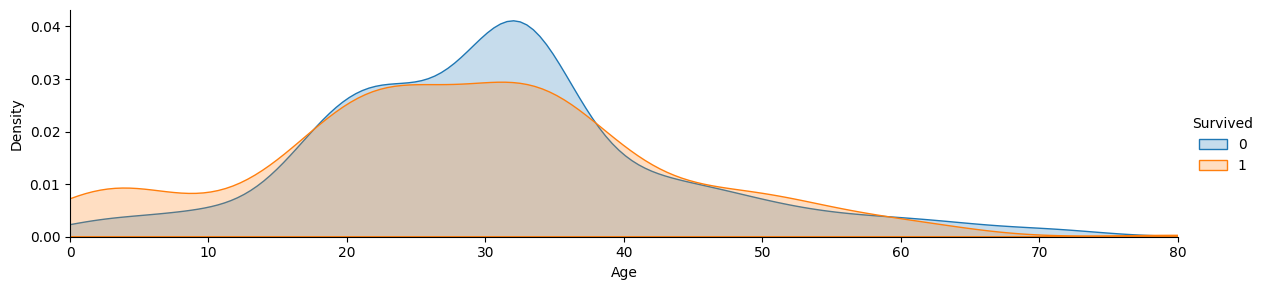

In [115]:
facet = sns.FacetGrid(train,
                     hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

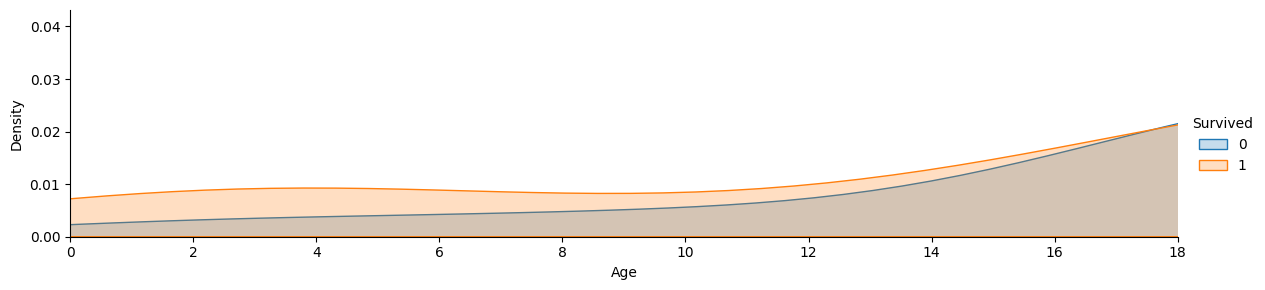

In [116]:
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train,hue = 'Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,18)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

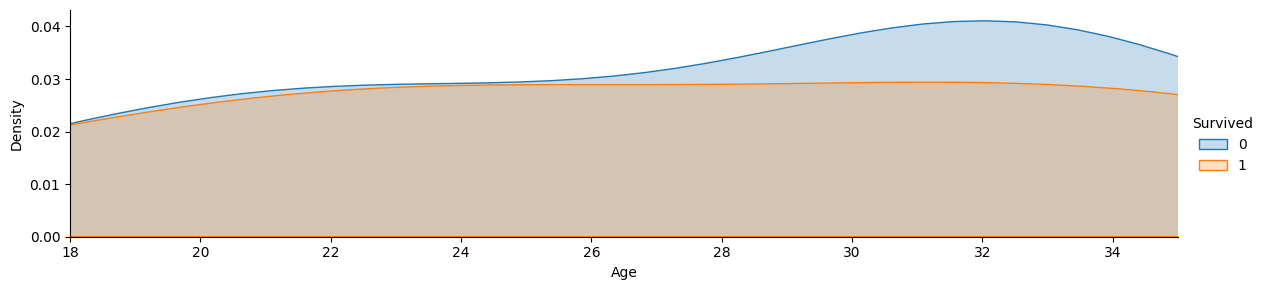

In [117]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(18,35)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

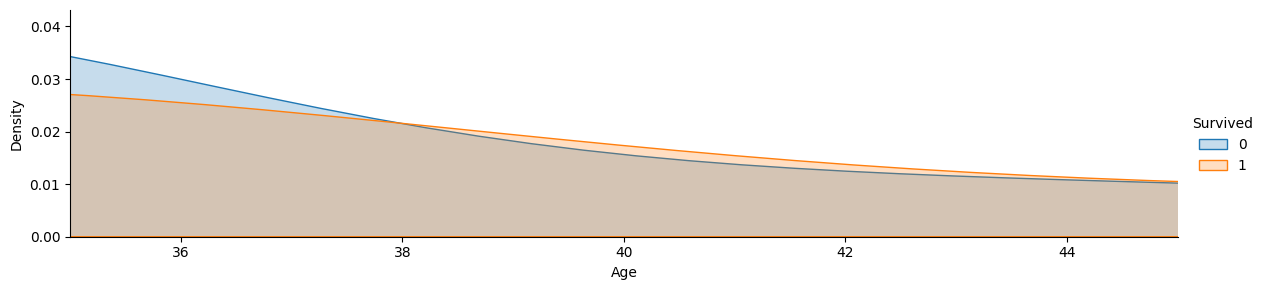

In [118]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(35,45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

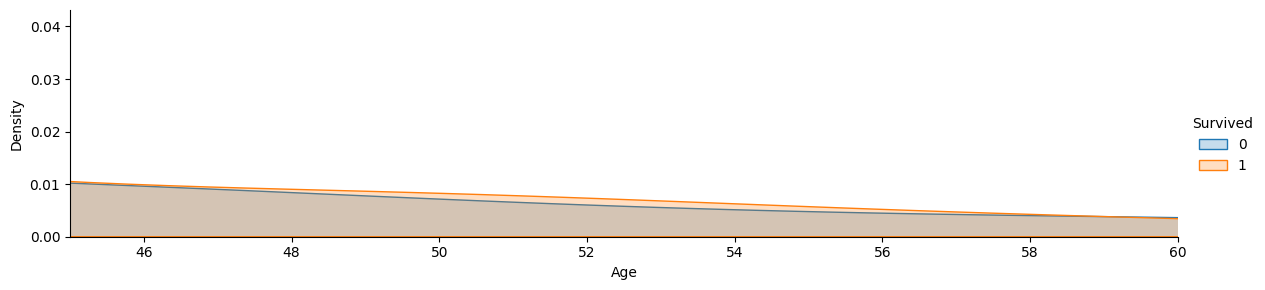

In [119]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(45,60)
plt.show()

In [120]:
for two_data in train_test_data:
    two_data.loc[two_data['Age']<=18,'Age']=0
    two_data.loc[(two_data['Age']>18)&(two_data['Age']<=35),'Age']=1
    two_data.loc[(two_data['Age']>35)&(two_data['Age']<=45),'Age']=2
    two_data.loc[(two_data['Age']>45)&(two_data['Age']<=60),'Age']=3
    two_data.loc[(two_data['Age']>60),'Age']=4

In [121]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


<Axes: >

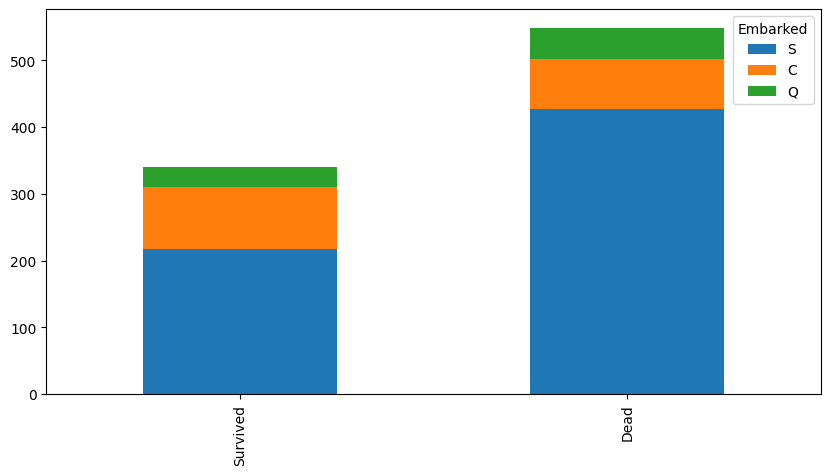

In [123]:
feature_selected = 'Embarked'

F_survived = train[train['Survived']==1][feature_selected].value_counts()
F_dead = train[train['Survived']==0][feature_selected].value_counts()
F_df = pd.DataFrame([F_survived,F_dead])
F_df.index = ['Survived','Dead']
F_df.plot(kind='bar',stacked=True,figsize=(10,5))

<Axes: >

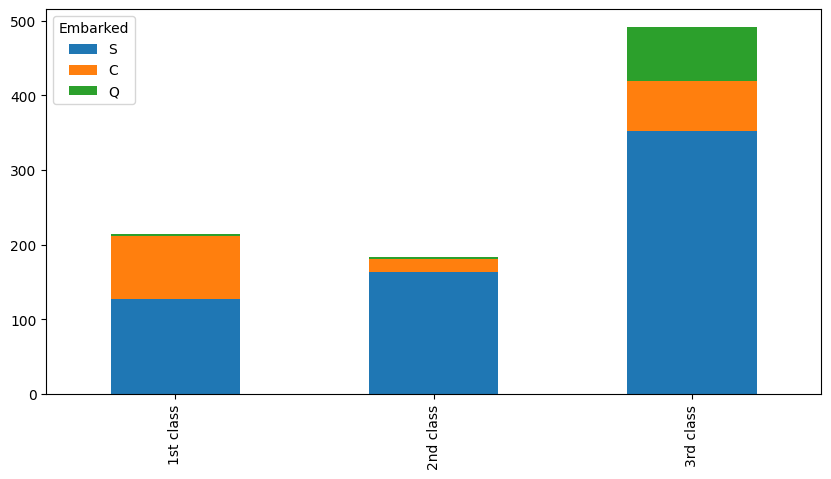

In [124]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [125]:
df

Embarked,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


In [126]:
for two_data in train_test_data:
    two_data['Embarked'] = two_data['Embarked'].fillna('S')

In [127]:
embarked_mapping = {'S':0,'C':1,'Q':2}

for two_data in train_test_data:
    two_data['Embarked'] = two_data['Embarked'].map(embarked_mapping)

In [128]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,0,0


In [129]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace = True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.1+ KB


/tmp/ipykernel_185/1266105467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace = True)
/tmp/ipykernel_185/1266105467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [130]:
train['Fare'].max()

512.3292

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

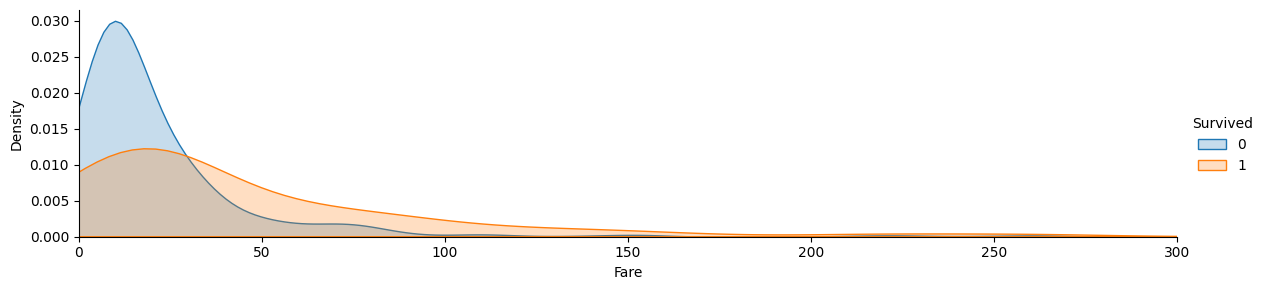

In [131]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,300)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

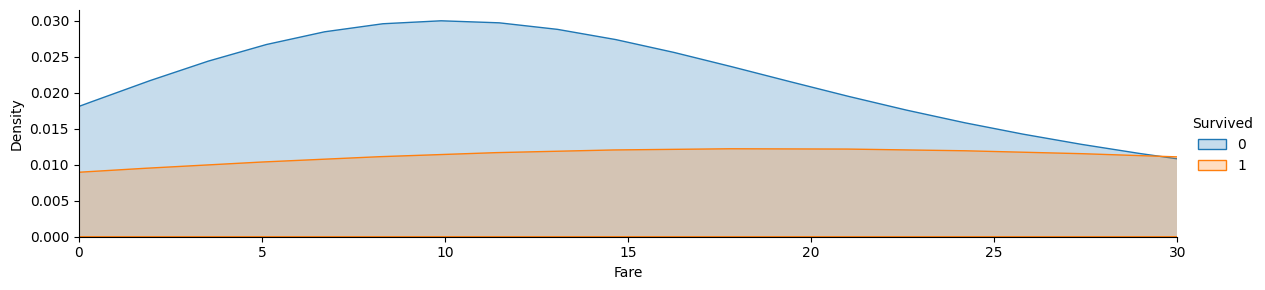

In [132]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,30)
plt.show()

In [133]:
for two_data in train_test_data:
    two_data.loc[two_data['Fare']<=5,'Fare']=0
    two_data.loc[(two_data['Fare']>5)&(two_data['Fare']<=15),'Fare']=1
    two_data.loc[(two_data['Fare']>15)&(two_data['Fare']<=30),'Fare']=2
    two_data.loc[(two_data['Fare']>30)&(two_data['Fare']<=100),'Fare']=3
    two_data.loc[(two_data['Fare']>100),'Fare']=4
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,3.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,3.0,C123,0,2
4,5,0,3,0,1.0,0,0,373450,1.0,NaN,0,0


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [135]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [136]:
for two_data in train_test_data:
    two_data['Cabin'] = two_data['Cabin'].str[:1]
train['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [137]:
train[train['Pclass']==1]['Cabin'].value_counts()

Cabin
C    59
B    47
D    29
E    25
A    15
T     1
Name: count, dtype: int64

In [138]:
train[train['Pclass']==2]['Cabin'].value_counts()

Cabin
F    8
D    4
E    4
Name: count, dtype: int64

In [139]:
train[train['Pclass']==3]['Cabin'].value_counts()

Cabin
F    5
G    4
E    3
Name: count, dtype: int64

<Axes: >

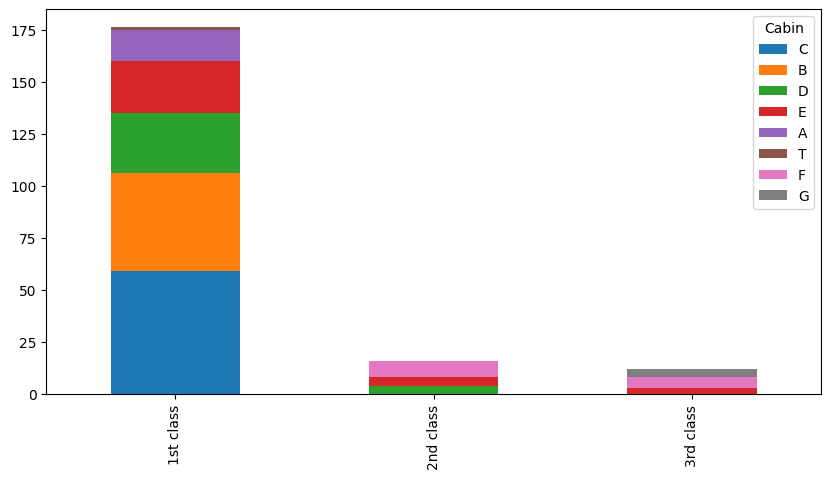

In [140]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [141]:
cabin_mapping = {'A':2,'B':2,'C':2,'T':2,
                'D':1,'G':1,
                'E':0,'F':0}
for two_data in train_test_data:
    two_data['Cabin'] = two_data['Cabin'].map(cabin_mapping)

In [142]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,3.0,2.0,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,3.0,2.0,0,2
4,5,0,3,0,1.0,0,0,373450,1.0,NaN,0,0


In [143]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace = True)

/tmp/ipykernel_185/2515921598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace = True)
/tmp/ipykernel_185/2515921598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [144]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,0.0,0,0
1,2,1,1,1,2.0,1,0,PC 17599,3.0,2.0,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,0.0,0,1
3,4,1,1,1,1.0,1,0,113803,3.0,2.0,0,2
4,5,0,3,0,1.0,0,0,373450,1.0,0.0,0,0


In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


In [146]:
train['Familysize'] = train['SibSp'] + train['Parch']+1
test['Familysize'] = test['SibSp'] + test['Parch']+1

In [147]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,0.0,0,0,2
1,2,1,1,1,2.0,1,0,PC 17599,3.0,2.0,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,0.0,0,1,1
3,4,1,1,1,1.0,1,0,113803,3.0,2.0,0,2,2
4,5,0,3,0,1.0,0,0,373450,1.0,0.0,0,0,1


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

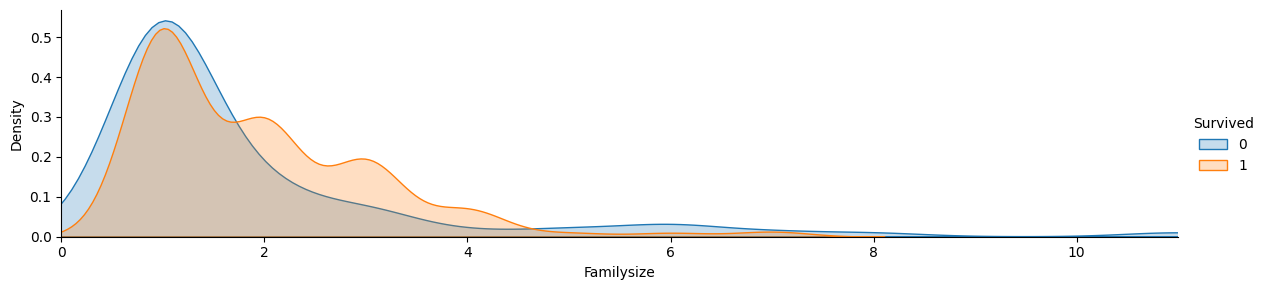

In [148]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Familysize',shade=True)
facet.set(xlim=(0,train['Familysize'].max()))
facet.add_legend()

plt.xlim(0)
plt.show()

In [149]:
train['Familysize'].value_counts()

Familysize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [150]:
for two_data in train_test_data:
    two_data.loc[two_data['Familysize']<=1,'Familysize']=0
    two_data.loc[(two_data['Familysize']>1)&(two_data['Familysize']<=2),'Familysize']=1
    two_data.loc[(two_data['Familysize']>2)&(two_data['Familysize']<=5),'Familysize']=2
    two_data.loc[two_data['Familysize']>5,'Familysize']=3


In [151]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,1.0,0.0,0,0,1
1,2,1,1,1,2.0,1,0,PC 17599,3.0,2.0,1,2,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,1.0,0.0,0,1,0
3,4,1,1,1,1.0,1,0,113803,3.0,2.0,0,2,1
4,5,0,3,0,1.0,0,0,373450,1.0,0.0,0,0,0


In [152]:
train['Familysize'].value_counts()

Familysize
0    537
1    161
2    146
3     47
Name: count, dtype: int64

In [153]:
# 제거할 불필요한 열 지정
feature_drop = ['Ticket', 'SibSp', 'Parch']

# 학습 데이터에서 지정한 열 제거
train = train.drop(feature_drop, axis=1)
train = train.drop('PassengerId', axis=1)

# 테스트 데이터에서도 동일한 열 제거
test = test.drop(feature_drop, axis=1)

# 입력(features)과 정답(labels) 분리
train_x = train.drop('Survived', axis=1)
train_y = train['Survived']




In [154]:
# 상위 5개 행 출력
train_x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1.0,1.0,0.0,0,0,1
1,1,1,2.0,3.0,2.0,1,2,1
2,3,1,1.0,1.0,0.0,0,1,0
3,1,1,1.0,3.0,2.0,0,2,1
4,3,0,1.0,1.0,0.0,0,0,0


In [155]:
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [156]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,892,3,0,1.0,1.0,0.0,2,0,0
1,893,3,1,3.0,1.0,0.0,0,2,1
2,894,2,0,4.0,1.0,0.0,2,0,0
3,895,3,0,1.0,1.0,0.0,0,0,0
4,896,3,1,1.0,1.0,0.0,0,2,2


In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold =KFold(n_splits = 10, shuffle=True,random_state=0)

In [181]:
k_clf = KNeighborsClassifier(n_neighbors = 10)
scoring1 = 'accuracy'
score = cross_val_score(k_clf,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

79.8


In [166]:
d_clf = DecisionTreeClassifier()
scoring1 = 'accuracy'
score = cross_val_score(d_clf,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

81.15


In [168]:
r_clf = RandomForestClassifier(n_estimators = 15)
scoring1 = 'accuracy'
score = cross_val_score(r_clf,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

81.48


In [169]:
g_clf = GaussianNB()
scoring1 = 'accuracy'
score = cross_val_score(g_clf,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

75.64


In [170]:
s_clf = SVC()
scoring1 = 'accuracy'
score = cross_val_score(s_clf,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

82.94


In [171]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
score = cross_val_score(lr_model,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

82.72


In [172]:
s_clf = SVC()
s_clf.fit(train_x,train_y)
test_x = test.drop('PassengerId',axis=1).copy()
prediction = s_clf.predict(test_x)

submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})
submission.to_csv('submission.csv',index=False)

In [173]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,892,3,0,1.0,1.0,0.0,2,0,0
1,893,3,1,3.0,1.0,0.0,0,2,1
2,894,2,0,4.0,1.0,0.0,2,0,0
3,895,3,0,1.0,1.0,0.0,0,0,0
4,896,3,1,1.0,1.0,0.0,0,2,2


In [174]:
test_x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1.0,1.0,0.0,2,0,0
1,3,1,3.0,1.0,0.0,0,2,1
2,2,0,4.0,1.0,0.0,2,0,0
3,3,0,1.0,1.0,0.0,0,0,0
4,3,1,1.0,1.0,0.0,0,2,2


In [175]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [176]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [177]:
from xgboost import XGBClassifier

x_clf = XGBClassifier(n_estimators = 10,random_state=123)
scoring1 = 'accuracy'
score = cross_val_score(x_clf,train_x,train_y,cv=k_fold,scoring=scoring1)
print(round(np.mean(score)*100,2))

82.72


In [185]:
from xgboost import XGBClassifier

x_model = XGBClassifier(n_estimators = 20,random_state=123)
x_model.fit(train_x,train_y)

pred = x_model.predict_proba(test_x)[:,1]
pred_label = np.where(pred>0.5,1,0)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],
                          'Survived':pred_label})
submission.to_csv('submission_xgboost.csv',index=False)